In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

C:\Users\nito8\AppData\Local\Temp\ipykernel_14596\3626671341.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed


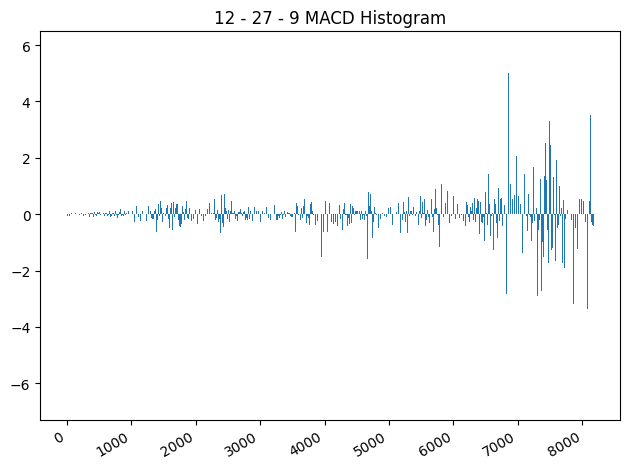

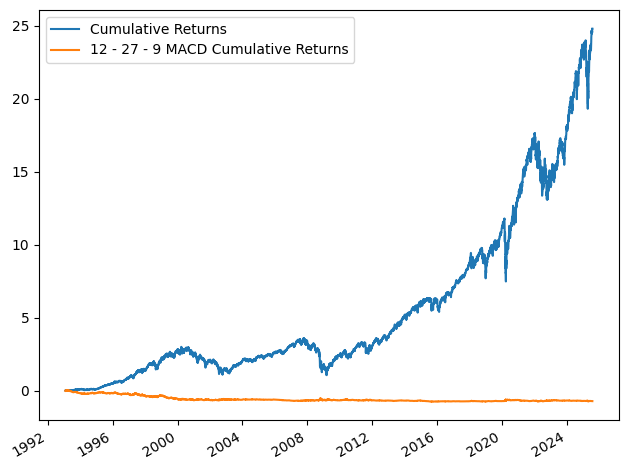

Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_hist,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,
1993-02-01,24.553835,24.553835,24.397772,24.397772,480500,24.474361,24.470347,0.004014,0.002230,0.001784,-1.0,0.007112,-0.007112
1993-02-02,24.605865,24.623206,24.484483,24.536504,201300,24.525687,24.518906,0.006781,0.004095,0.002686,1.0,0.009246,-0.005008
1993-02-03,24.865973,24.883313,24.623208,24.640549,529400,24.633102,24.615542,0.017560,0.008656,0.008903,1.0,0.019915,0.005510
1993-02-04,24.970016,25.022037,24.675232,24.952676,531500,24.724641,24.697314,0.027327,0.014210,0.013116,1.0,0.024182,0.009717
1993-02-05,24.952660,25.004680,24.813937,24.952660,492100,24.780061,24.748126,0.031935,0.019015,0.012920,1.0,0.023471,0.009015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-15,622.140015,627.859985,622.059998,627.520020,74317300,619.753739,610.225038,9.528701,9.857649,-0.328948,1.0,24.518000,-0.711541
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,620.440851,611.224676,9.216176,9.729355,-0.513179,-1.0,24.603313,-0.712505
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,621.609948,612.425769,9.184179,9.620320,-0.436140,-1.0,24.759996,-0.714264


In [2]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 10000

def get_data(ticker = TICKER, lookback = LOOKBACK):
    df = yf.download(ticker, period="max")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    # MACD line is the difference between the fast and slow moving averages
    df[f'MACD'] = df[f'{fast}_ema'] -  df[f'{slow}_ema']

    # MACD signal is a span-period moving average of the line
    df['Signal'] = df['MACD'].ewm(span=span).mean()

    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{fast} - {slow} - {span} MACD Histogram')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df 

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'], label='Cumulative Returns')
    plt.plot(df['Strategy_Returns'], label=f'{fast} - {slow} - {span} MACD Cumulative Returns')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

main()

C:\Users\nito8\AppData\Local\Temp\ipykernel_14596\652272769.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed


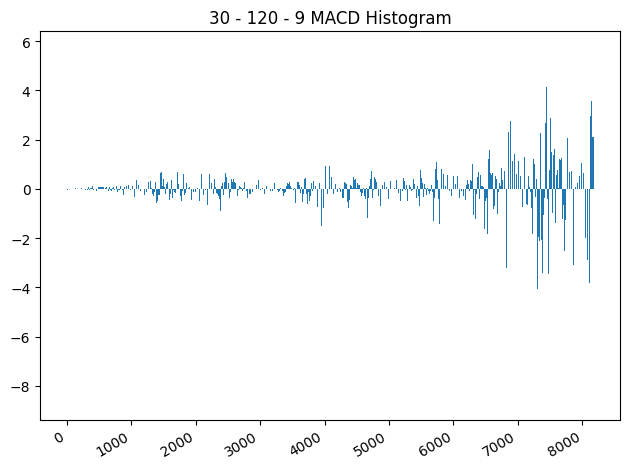

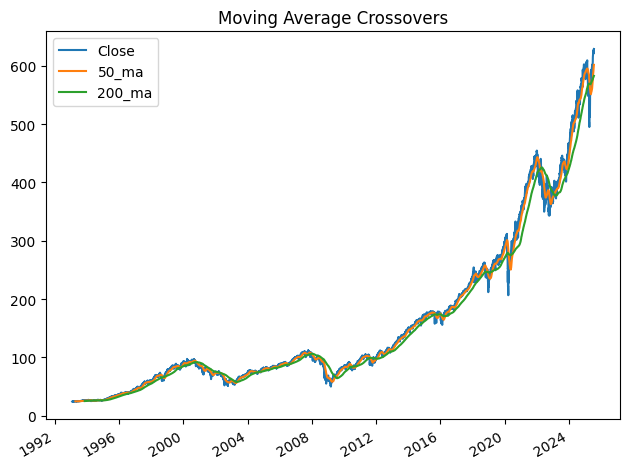

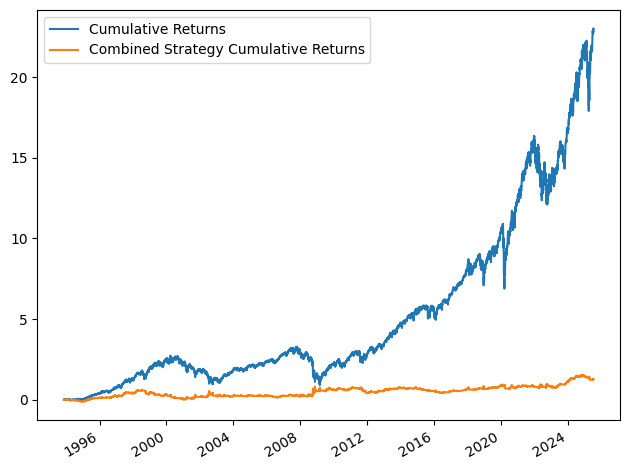

Price,Close,High,Low,Open,Volume,30_ema,120_ema,MACD,Signal,MACD_hist,50_ma,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,,,
1993-11-12,26.323586,26.411860,26.235311,26.252966,108200,26.189557,25.777768,0.411789,0.434466,-0.022677,26.114033,25.317937,0.0,0.004718,0.000000
1993-11-15,26.305916,26.376536,26.235296,26.376536,243300,26.197064,25.786810,0.410255,0.429624,-0.019369,26.119396,25.326697,0.0,0.004044,0.000000
1993-11-16,26.429510,26.447165,26.252960,26.358890,492600,26.212061,25.797806,0.414255,0.426550,-0.012295,26.130740,25.335815,0.0,0.008761,0.000000
1993-11-17,26.288256,26.447150,26.217636,26.447150,39600,26.216977,25.806192,0.410784,0.423397,-0.012613,26.141014,25.342927,0.0,0.003370,0.000000
1993-11-18,26.217648,26.305922,26.147028,26.252958,240800,26.217020,25.813224,0.403796,0.419477,-0.015681,26.148822,25.349165,0.0,0.000675,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-15,622.140015,627.859985,622.059998,627.520020,74317300,608.419376,584.453662,23.965715,21.649089,2.316626,596.258611,581.402499,1.0,22.745827,1.262300
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,609.438770,585.110956,24.327813,22.184834,2.142980,597.441222,581.699828,1.0,22.825215,1.269864
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,610.638848,585.820527,24.818321,22.711531,2.106790,598.765042,582.005060,1.0,22.971017,1.283754


In [3]:
# Combining MACD with MA crossovers
TICKER = 'SPY'
MACD_FAST = 30
MACD_SLOW = 120
MACD_SPAN = 9
MA_FAST = 50
MA_SLOW = 200
LOOKBACK = 10000

def get_data(ticker = TICKER, lookback = LOOKBACK):
    df = yf.download(ticker, period="max")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    # MACD line is the difference between the fast and slow moving averages
    df[f'MACD'] = df[f'{fast}_ema'] -  df[f'{slow}_ema']

    # MACD signal is a span-period moving average of the line
    df['Signal'] = df['MACD'].ewm(span=span).mean()

    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{fast} - {slow} - {span} MACD Histogram')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df 

def add_moving_averages(df, fast=MA_FAST, slow=MA_SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(slow).mean()

    plt.plot(df['Close'], label='Close')
    plt.plot(df[f'{fast}_ma'], label=f'{fast}_ma')
    plt.plot(df[f'{slow}_ma'], label=f'{slow}_ma')
    plt.legend()
    plt.title('Moving Average Crossovers')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def add_strategy(df, fast=MA_FAST, slow=MA_SLOW):
    df['Strategy'] = 0
    cond1 = df[f'{fast}_ma'] > df[f'{slow}_ma']
    cond2 = df['MACD_hist'] > 0
    conditions = [cond1 & cond2, ~cond1 & ~cond2]
    choices = [1, -1]
    df['Strategy'] = np.select(conditions, choices)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'], label='Cumulative Returns')
    plt.plot(df['Strategy_Returns'], label=f'Combined Strategy Cumulative Returns')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_moving_averages(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

main()